### The Time Machine (loaded)

In [8]:
import sys
sys.path.insert(0, '..')

import collections
import re
with open('timemachine.txt', 'r',encoding='utf-8',) as f:
    lines = f.readlines()
    raw_dataset = [re.sub('[^A-Za-z]+', ' ', st).lower().split() for st in lines]

# Let's read the first 10 lines of the text    
for st in raw_dataset[0:10]:
    print('# tokens:', len(st), st)        

# tokens: 12 ['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'time', 'machine', 'by', 'h', 'g', 'wells']
# tokens: 14 ['this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with']
# tokens: 12 ['almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or']
# tokens: 12 ['re', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included']
# tokens: 9 ['with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'net']
# tokens: 4 ['title', 'the', 'time', 'machine']
# tokens: 0 []
# tokens: 4 ['author', 'h', 'g', 'wells']
# tokens: 0 []
# tokens: 4 ['release', 'date', 'october', 'ebook']


### Word Counts

In [9]:
counter = collections.Counter([tk for st in raw_dataset for tk in st])
print("frequency of 'traveller':", counter['traveller'])
# Print the 10 most frequent words with word frequency count
print(counter.most_common(10))

frequency of 'traveller': 65
[('the', 2472), ('and', 1314), ('of', 1284), ('i', 1268), ('a', 877), ('to', 765), ('in', 605), ('was', 554), ('that', 458), ('it', 452)]


### Frequency Statistics

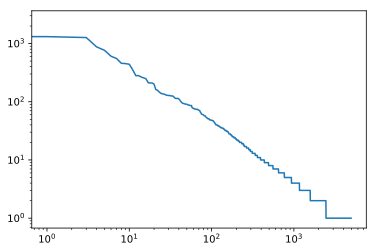

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

wordcounts = [count for _,count in counter.most_common()]
plt.loglog(wordcounts);

### Zipf's Law   

For example, Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

$$n(x) \propto (x + c)^{-\alpha} \text{ and hence }
\log n(x) = -\alpha \log (x+c) + \mathrm{const.}$$

Does it work for word pairs, too?

In [11]:
wseq = [tk for st in raw_dataset for tk in st]
word_pairs = [pair for pair in zip(wseq[:-1], wseq[1:])]
print('Beginning of the book\n', word_pairs[:10])
counter_pairs = collections.Counter(word_pairs)
print('Most common word pairs\n', counter_pairs.most_common(10))

Beginning of the book
 [('the', 'project'), ('project', 'gutenberg'), ('gutenberg', 'ebook'), ('ebook', 'of'), ('of', 'the'), ('the', 'time'), ('time', 'machine'), ('machine', 'by'), ('by', 'h'), ('h', 'g')]
Most common word pairs
 [(('of', 'the'), 340), (('in', 'the'), 190), (('i', 'had'), 130), (('and', 'the'), 113), (('i', 'was'), 112), (('the', 'time'), 111), (('to', 'the'), 101), (('it', 'was'), 99), (('project', 'gutenberg'), 88), (('as', 'i'), 78)]


### Frequency Statistics

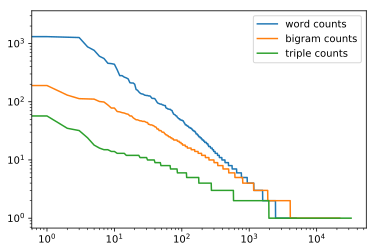

In [12]:
word_triples = [triple for triple in zip(wseq[:-2], wseq[1:-1], wseq[2:])]
counter_triples = collections.Counter(word_triples)

bigramcounts = [count for _,count in counter_pairs.most_common()]
triplecounts = [count for _,count in counter_triples.most_common()]
plt.loglog(wordcounts, label='word counts');
plt.loglog(bigramcounts, label='bigram counts');
plt.loglog(triplecounts, label='triple counts');
plt.legend();